В данном проекте я хочу рассмотреть влияние тех или иных факторов на успеваемость студентов на основе датасета "Student Performance Factors" с Kaggle

# Влияние семейных факторов на успеваемость студентов

Гипотеза: Семейные факторы, такие как уровень образования родителей, уровень дохода семьи и вовлеченность родителей в образовательный процесс, положительно влияют на успеваемость студентов, что выражается в более высоких баллах за экзамены

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


{'StudentPerformanceFactors.csv': b'Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score\r\n23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67\r\n19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61\r\n24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74\r\n29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71\r\n19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70\r\n19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71\r\n29,84,Medium,Low,Yes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('StudentPerformanceFactors.csv')

In [ ]:
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
print(dataset.info())
print('-------------------------------------')
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
dataset.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


есть нулевые значения, следовательно их нужно убрать

In [ ]:
data = dataset.dropna()
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#зависим перемен итоговый балл за экзамен
target = 'Exam_Score'

#независ перемен семейные факторы
family_factors = ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Distance_from_Home']

print("Зависимая переменная (целевая):", target)
print("Независимые переменные (факторы):", family_factors)

Зависимая переменная (целевая): Exam_Score
Независимые переменные (факторы): ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Distance_from_Home']


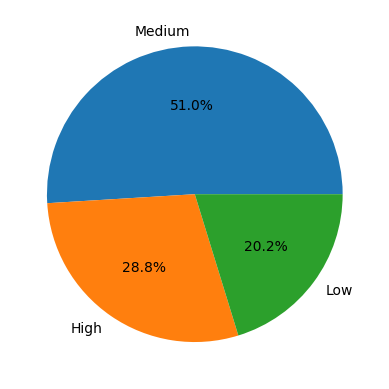

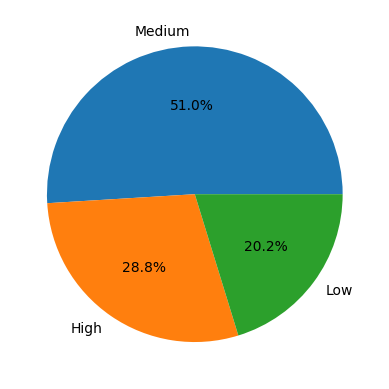

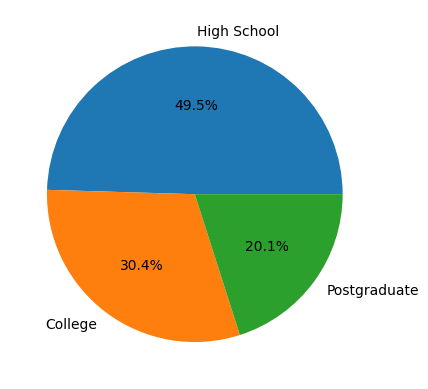

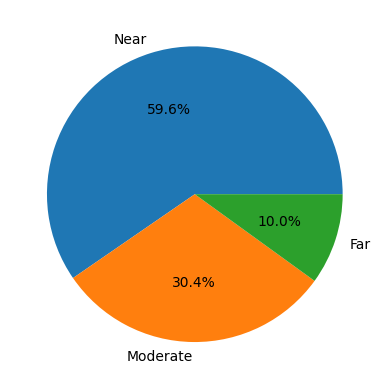

In [ ]:
parent_inv = data['Parental_Involvement'].value_counts()
plt.pie(parent_inv.values, labels=parent_inv.index, autopct='%.1f%%')
plt.show()

family_inc = data['Family_Income'].value_counts()
plt.pie(parent_inv.values, labels=parent_inv.index, autopct='%.1f%%')
plt.show()

parent = data['Parental_Education_Level'].value_counts()
plt.pie(parent.values, labels=parent.index, autopct='%.1f%%')
plt.show()

parent = data['Distance_from_Home'].value_counts()
plt.pie(parent.values, labels=parent.index, autopct='%.1f%%')
plt.show()

#распределение каждого фактора из family_factors

67.25211665098777


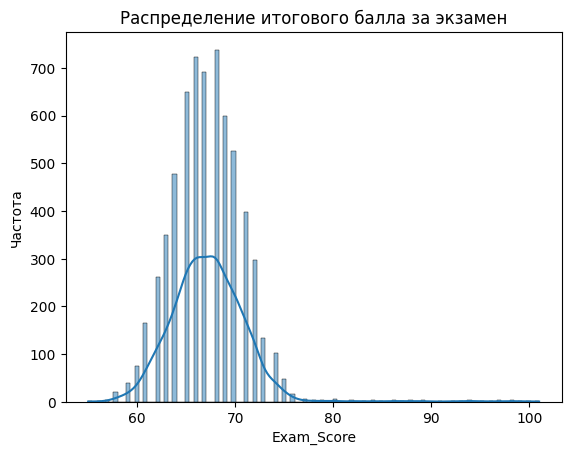

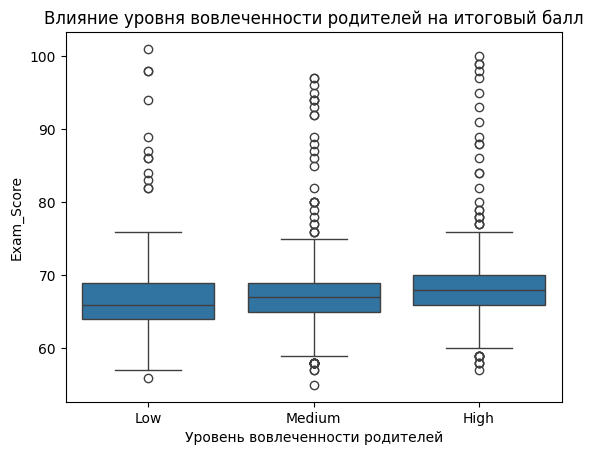

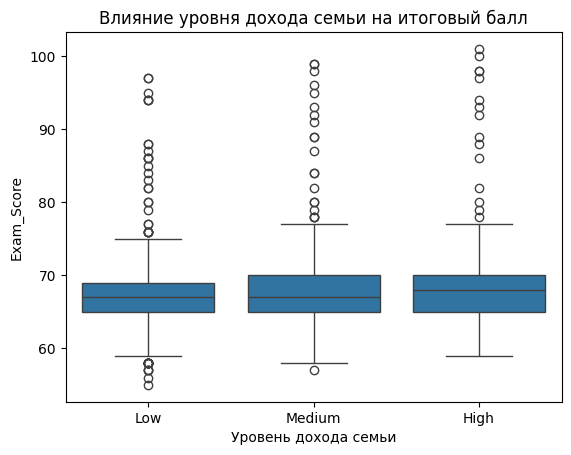

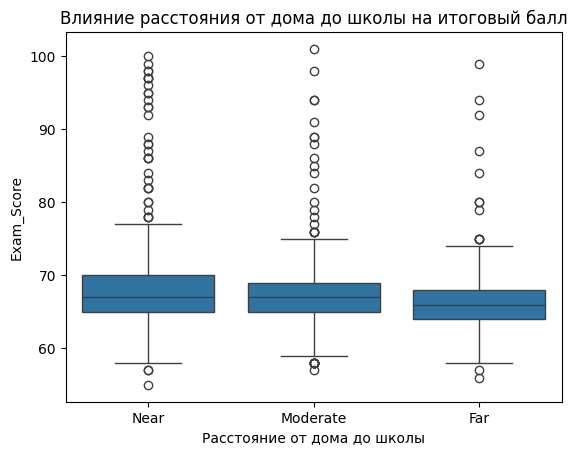

In [ ]:
print(data['Exam_Score'].mean())
sns.histplot(data[target], kde=True)
plt.title('Распределение итогового балла за экзамен')
plt.xlabel('Exam_Score')
plt.ylabel('Частота')
plt.show()

sns.boxplot(x='Parental_Involvement', y=target, data=data)
plt.title('Влияние уровня вовлеченности родителей на итоговый балл')
plt.xlabel('Уровень вовлеченности родителей')
plt.ylabel('Exam_Score')
plt.show()

sns.boxplot(x='Family_Income', y=target, data=data)
plt.title('Влияние уровня дохода семьи на итоговый балл')
plt.xlabel('Уровень дохода семьи')
plt.ylabel('Exam_Score')
plt.show()

sns.boxplot(x='Distance_from_Home', y=target, data=data)
plt.title('Влияние расстояния от дома до школы на итоговый балл')
plt.xlabel('Расстояние от дома до школы')
plt.ylabel('Exam_Score')
plt.show()

0) можно увидеть распределение баллов, в основном дети получают 67 баллов

1) я вижу связь между уровнем вовлеченности родителей и результатами экзаменов, чем больше родитель уделяет внимания тем лучше результат ребенка

2) уровень дохода влияет мало, это можно увидеть из графика. конечно результаты детей из богатых семей чуть выше чем у детей из бедных, но это разница очень маленькая

3) из этого графика можно понять что расстояние все же влияет на результаты экзаменов. дети живущие близко имеют более лучшие результаты, чем дети живущие далеко

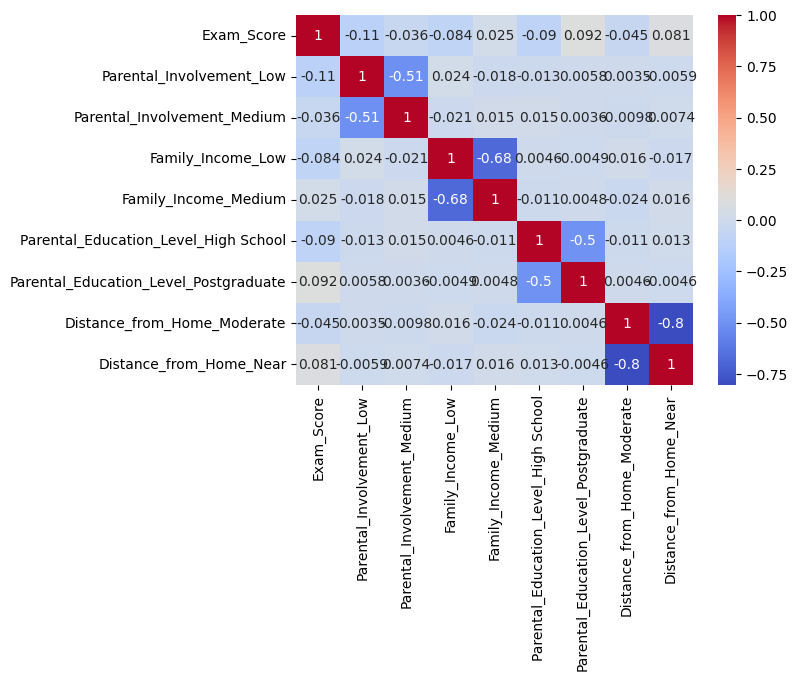

In [ ]:
data_encoded = pd.get_dummies(data[family_factors + [target]], drop_first=True)
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Выводы:
1. Уровень вовлеченности родителей положительно влияет на итоговый балл за экзамен
2. Студенты из семей с высоким уровнем дохода имеют более высокие баллы
3. Уровень образования родителей также положительно влияет на успеваемость
4. Близкое нахождение к школе, увеличивает результат

**гипотеза оправдалась лишь отчасти**

# Анализ влияния сна на успеваемость студентов

Гипотеза: у студентов с хорошим уровнем сна результаты за экзамен лучше

7.034963938538727


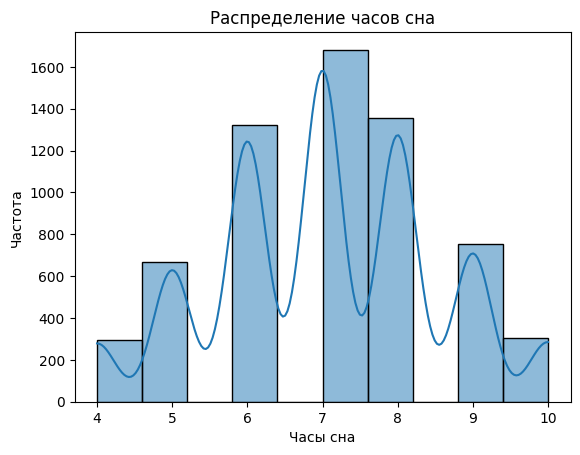

In [ ]:
print(data['Sleep_Hours'].mean())

sns.histplot(data['Sleep_Hours'], kde=True, bins=10)
plt.title('Распределение часов сна')
plt.xlabel('Часы сна')
plt.ylabel('Частота')
plt.show()

на графике видно, что в среднем ученики спят по 7 часов + значение mean равно 7.03

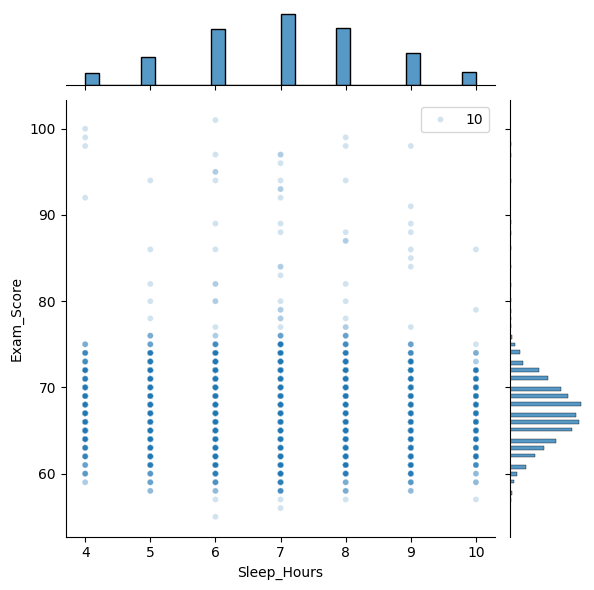

In [ ]:
sns.jointplot(x=data['Sleep_Hours'], y=data['Exam_Score'],size=10, alpha=0.2)
plt.show()
#график не показывает то чего я хотела, поэтому постротрим другие варианты графиков

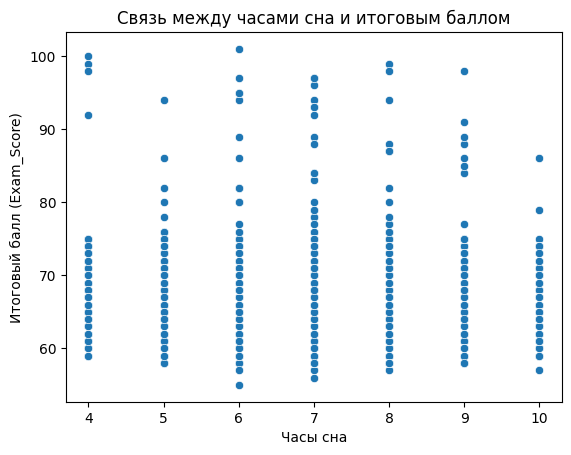

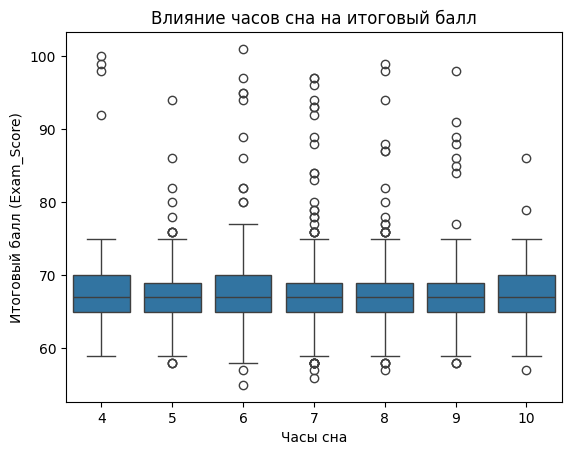

In [ ]:
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data)
plt.title('Связь между часами сна и итоговым баллом')
plt.xlabel('Часы сна')
plt.ylabel('Итоговый балл (Exam_Score)')
plt.show()

sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=data)
plt.title('Влияние часов сна на итоговый балл')
plt.xlabel('Часы сна')
plt.ylabel('Итоговый балл (Exam_Score)')
plt.show()

по графику 'Влияние часов сна на итоговый балл' можно сделать вывод что на удивление сон мало влияет на результаты экзаменов

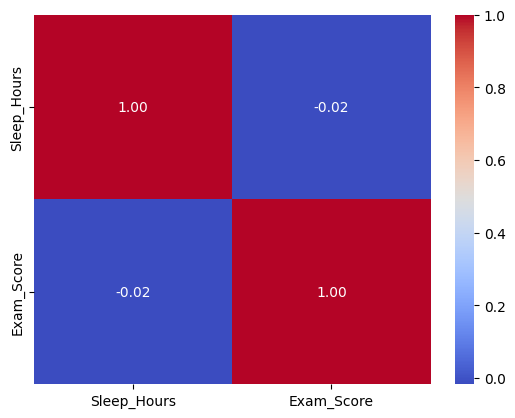

In [ ]:
#расчет корреляции м/у сном и успеваемостью
correlation = data['Sleep_Hours'].corr(data['Exam_Score'])
corr_matrix = data[['Sleep_Hours', 'Exam_Score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

График и значение корреляции (0.02) указывают на то, что количество часов сна не влияет на итоговый балл за экзамен в линейной модели

**Гипотеза не оправдалась, она не верна**

# Влияние качества учителей (Teacher_Quality) на успеваемость студентов

Гипотеза: Студенты, обучающиеся у высококвалифицированных учителей, имеют более высокие баллы

In [ ]:
print(data['Teacher_Quality'].isnull().sum())
#то есть NaN отсутствует

0


In [ ]:
data['Teacher_Quality'].info()

<class 'pandas.core.series.Series'>
Index: 6378 entries, 0 to 6606
Series name: Teacher_Quality
Non-Null Count  Dtype 
--------------  ----- 
6378 non-null   object
dtypes: object(1)
memory usage: 99.7+ KB


In [ ]:
data['Teacher_Quality'].describe()

,Teacher_Quality
count,6378
unique,3
top,Medium
freq,3826


распределение признака качества преподователей

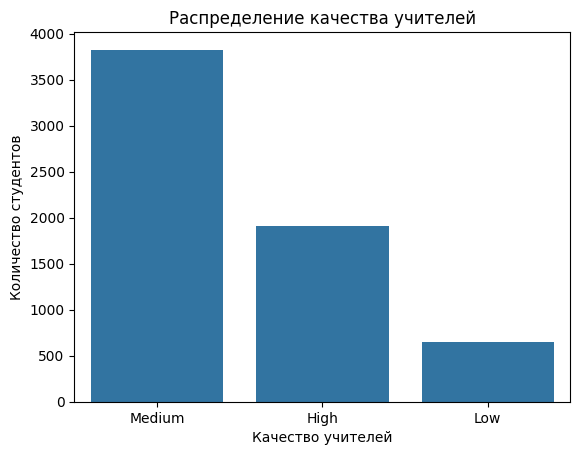

In [ ]:
sns.countplot(x='Teacher_Quality', data=data)
plt.title('Распределение качества учителей')
plt.xlabel('Качество учителей')
plt.ylabel('Количество студентов')
plt.show()

на графике видно что больше всего учителей среднего уровня

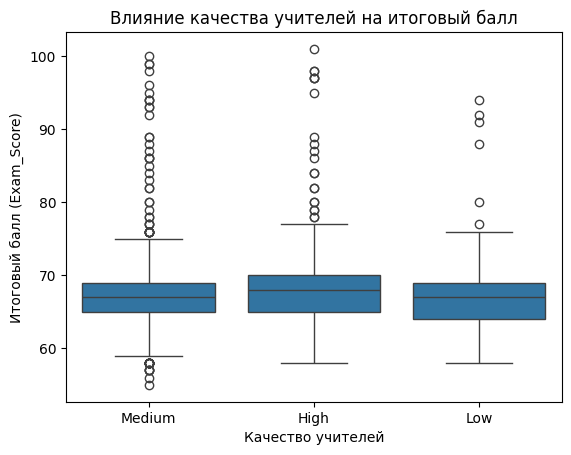

In [ ]:
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=data)
plt.title('Влияние качества учителей на итоговый балл')
plt.xlabel('Качество учителей')
plt.ylabel('Итоговый балл (Exam_Score)')
plt.show()

на графике видно что вли

In [ ]:
#расчет корреляции м/у качеством учителей и успеваемостью
#преобраз Teacher_Quality в числ формат
quality_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Teacher_Quality_Encoded'] = data['Teacher_Quality'].map(quality_mapping)

data_selected = data[['Teacher_Quality_Encoded', 'Exam_Score']]

corr_matrix = data_selected.corr()
print(corr_matrix)

                         Teacher_Quality_Encoded  Exam_Score
Teacher_Quality_Encoded                 1.000000    0.075107
Exam_Score                              0.075107    1.000000


<ipython-input-86-4ba5896154f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Teacher_Quality_Encoded'] = data['Teacher_Quality'].map(quality_mapping)


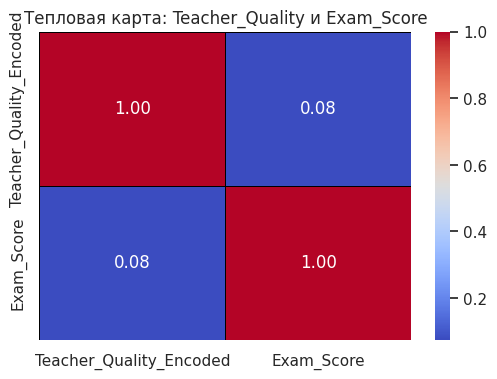

In [ ]:
sns.set(style="white") #стиль

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Тепловая карта: Teacher_Quality и Exam_Score')
plt.show()

значение коррел-ии равно 0.08 это значение близко к 0, что говорит об отсутствии корреляции. это говорит нам о том, что качество учителей почти не влияет на результаты экзаменов


**в общем моя гипотеза не оправдалась, она не верна**